In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/TOI_2025.10.04_04.18.18.csv")

In [ ]:
df

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,...,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,...,-0.07,0,1,2.169860,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,...,-0.09,0,1,2.010000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,...,NaN,0,1,5.730000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,NaN,...,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,...,-0.07,0,1,2.150000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,7699,995.01,995,317951248,3.179512e+08,1,FP,07h23m14.75s,110.811443,NaN,...,NaN,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
7699,7700,996.01,996,142918609,1.429186e+08,1,FP,07h57m23.99s,119.349948,NaN,...,NaN,0,1,2.050000,NaN,NaN,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
7700,7701,997.01,997,341729521,3.417295e+08,1,FP,08h05m16.69s,121.319521,NaN,...,-0.08,0,1,0.926261,0.045789,-0.045789,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
7701,7702,998.01,998,54390047,5.439005e+07,1,FP,07h53m16.69s,118.319555,NaN,...,-0.07,0,1,2.349860,0.091578,-0.091578,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01


In [ ]:
drop_cols = [
    # IDs / metadata
    "toi", "toipfx", "tid", "ctoi_alias", "pl_pnum",
    "rastr", "decstr", "toi_created", "rowupdate", "rowid",

    # RA/Dec
    "ra", "raerr1", "raerr2", "dec", "decerr1", "decerr2",

    # Transit midpoint
    "pl_tranmid", "pl_tranmiderr1", "pl_tranmiderr2",
    "pl_tranmidlim", "pl_tranmidsymerr",

    # Transit orbital period uncertainties
    "pl_orbpererr1", "pl_orbpererr2", "pl_orbperlim", "pl_orbpersymerr",

    # Transit duration uncertainties
    "pl_trandurherr1", "pl_trandurherr2", "pl_trandurhlim", "pl_trandurhsymerr",

    # Transit depth uncertainties
    "pl_trandeperr1", "pl_trandeperr2", "pl_trandeplim", "pl_trandepsymerr",

    # Planet radius uncertainties
    "pl_radeerr1", "pl_radeerr2", "pl_radelim", "pl_radesymerr",

    # Insolation uncertainties
    "pl_insolerr1", "pl_insolerr2", "pl_insollim", "pl_insolsymerr",

    # Equilibrium temperature uncertainties
    "pl_eqterr1", "pl_eqterr2", "pl_eqtlim", "pl_eqtsymerr",

    # TESS magnitude uncertainties
    "st_tmagerr1", "st_tmagerr2", "st_tmaglim", "st_tmagsymerr",

    # Stellar distance uncertainties
    "st_disterr1", "st_disterr2", "st_distlim", "st_distsymerr",

    # Stellar temperature uncertainties
    "st_tefferr1", "st_tefferr2", "st_tefflim", "st_teffsymerr",

    # Stellar logg uncertainties
    "st_loggerr1", "st_loggerr2", "st_logglim", "st_loggsymerr",

    # Stellar radius uncertainties
    "st_raderr1", "st_raderr2", "st_radlim", "st_radsymerr",

    # Proper motion RA uncertainties
    "st_pmraerr1", "st_pmraerr2", "st_pmralim", "st_pmrasymerr",

    # Proper motion Dec uncertainties
    "st_pmdecerr1", "st_pmdecerr2", "st_pmdeclim", "st_pmdecsymerr"
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")


In [ ]:
df

,tfopwg_disp,st_pmra,st_pmdec,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad
0,FP,-5.964,-0.076,2.171348,2.017220,656.886099,5.818163,22601.948581,3127.204052,9.604000,485.735,10249.0,4.19,2.169860
1,PC,-4.956,-15.555,1.931646,3.166000,1286.000000,11.215400,44464.500000,4045.000000,9.423440,295.862,7070.0,4.03,2.010000
2,FP,-1.462,-2.249,1.867557,1.408000,1500.000000,23.752900,2860.610000,2037.000000,9.299501,943.109,8924.0,NaN,5.730000
3,FP,-0.939,1.640,2.743230,3.167000,383.410000,NaN,1177.360000,1631.000000,9.300300,7728.170,5388.5,4.15,NaN
4,FP,-4.496,9.347,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,9.135500,356.437,9219.0,4.14,2.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,FP,2.061,-7.082,3.443800,2.572000,7260.750000,NaN,1413.670000,1708.000000,10.078100,1080.880,4805.2,NaN,NaN
7699,FP,-3.900,3.866,14.537800,6.826000,4040.000000,16.052300,NaN,NaN,9.792500,379.693,8007.0,NaN,2.050000
7700,FP,-44.770,-2.616,8.413486,3.556833,17479.605331,20.510696,127.916421,857.731431,9.772700,113.667,5786.0,4.52,0.926261
7701,FP,-1.706,-1.714,0.941436,1.360700,339.912662,4.529209,41562.587811,3641.626449,9.695200,482.278,8322.0,4.01,2.349860


In [ ]:
valid_labels = ["CP", "PC", "FP"]
df = df[df["tfopwg_disp"].isin(valid_labels)].copy()

In [ ]:
df = df.dropna()

In [ ]:
df

,tfopwg_disp,st_pmra,st_pmdec,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad
0,FP,-5.964,-0.076,2.171348,2.017220,656.886099,5.818163,22601.948581,3127.204052,9.60400,485.735,10249.0,4.19,2.169860
1,PC,-4.956,-15.555,1.931646,3.166000,1286.000000,11.215400,44464.500000,4045.000000,9.42344,295.862,7070.0,4.03,2.010000
4,FP,-4.496,9.347,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,9.13550,356.437,9219.0,4.14,2.150000
7,PC,0.357,3.399,6.998921,3.953000,2840.000000,14.775200,448.744000,1282.000000,8.87759,283.291,6596.0,3.71,2.700000
12,PC,145.102,-134.901,2.470498,2.191000,250.000000,1.446560,575.597000,1364.000000,8.23880,52.620,5413.7,4.46,0.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,PC,-9.483,-4.963,1.463502,1.518000,914.000000,4.758690,4081.060000,2226.000000,10.06340,366.482,8035.0,4.28,1.670000
7697,FP,-7.229,-2.482,2.396722,3.945317,384.898547,3.838449,15531.063624,2847.213599,10.02670,543.152,10393.0,4.32,1.877390
7700,FP,-44.770,-2.616,8.413486,3.556833,17479.605331,20.510696,127.916421,857.731431,9.77270,113.667,5786.0,4.52,0.926261
7701,FP,-1.706,-1.714,0.941436,1.360700,339.912662,4.529209,41562.587811,3641.626449,9.69520,482.278,8322.0,4.01,2.349860


In [ ]:
#Encode target column as integer
df["tfopwg_disp"] = df["tfopwg_disp"].astype("category").cat.codes

In [ ]:
df

,tfopwg_disp,st_pmra,st_pmdec,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad
0,1,-5.964,-0.076,2.171348,2.017220,656.886099,5.818163,22601.948581,3127.204052,9.60400,485.735,10249.0,4.19,2.169860
1,2,-4.956,-15.555,1.931646,3.166000,1286.000000,11.215400,44464.500000,4045.000000,9.42344,295.862,7070.0,4.03,2.010000
4,1,-4.496,9.347,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,9.13550,356.437,9219.0,4.14,2.150000
7,2,0.357,3.399,6.998921,3.953000,2840.000000,14.775200,448.744000,1282.000000,8.87759,283.291,6596.0,3.71,2.700000
12,2,145.102,-134.901,2.470498,2.191000,250.000000,1.446560,575.597000,1364.000000,8.23880,52.620,5413.7,4.46,0.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,2,-9.483,-4.963,1.463502,1.518000,914.000000,4.758690,4081.060000,2226.000000,10.06340,366.482,8035.0,4.28,1.670000
7697,1,-7.229,-2.482,2.396722,3.945317,384.898547,3.838449,15531.063624,2847.213599,10.02670,543.152,10393.0,4.32,1.877390
7700,1,-44.770,-2.616,8.413486,3.556833,17479.605331,20.510696,127.916421,857.731431,9.77270,113.667,5786.0,4.52,0.926261
7701,1,-1.706,-1.714,0.941436,1.360700,339.912662,4.529209,41562.587811,3641.626449,9.69520,482.278,8322.0,4.01,2.349860


In [ ]:
#Seperating features and target
target_col = "tfopwg_disp"
X = df.drop(columns=[target_col])
y = df[target_col]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5611 entries, 0 to 7702
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tfopwg_disp  5611 non-null   int8   
 1   st_pmra      5611 non-null   float64
 2   st_pmdec     5611 non-null   float64
 3   pl_orbper    5611 non-null   float64
 4   pl_trandurh  5611 non-null   float64
 5   pl_trandep   5611 non-null   float64
 6   pl_rade      5611 non-null   float64
 7   pl_insol     5611 non-null   float64
 8   pl_eqt       5611 non-null   float64
 9   st_tmag      5611 non-null   float64
 10  st_dist      5611 non-null   float64
 11  st_teff      5611 non-null   float64
 12  st_logg      5611 non-null   float64
 13  st_rad       5611 non-null   float64
dtypes: float64(13), int8(1)
memory usage: 619.2 KB


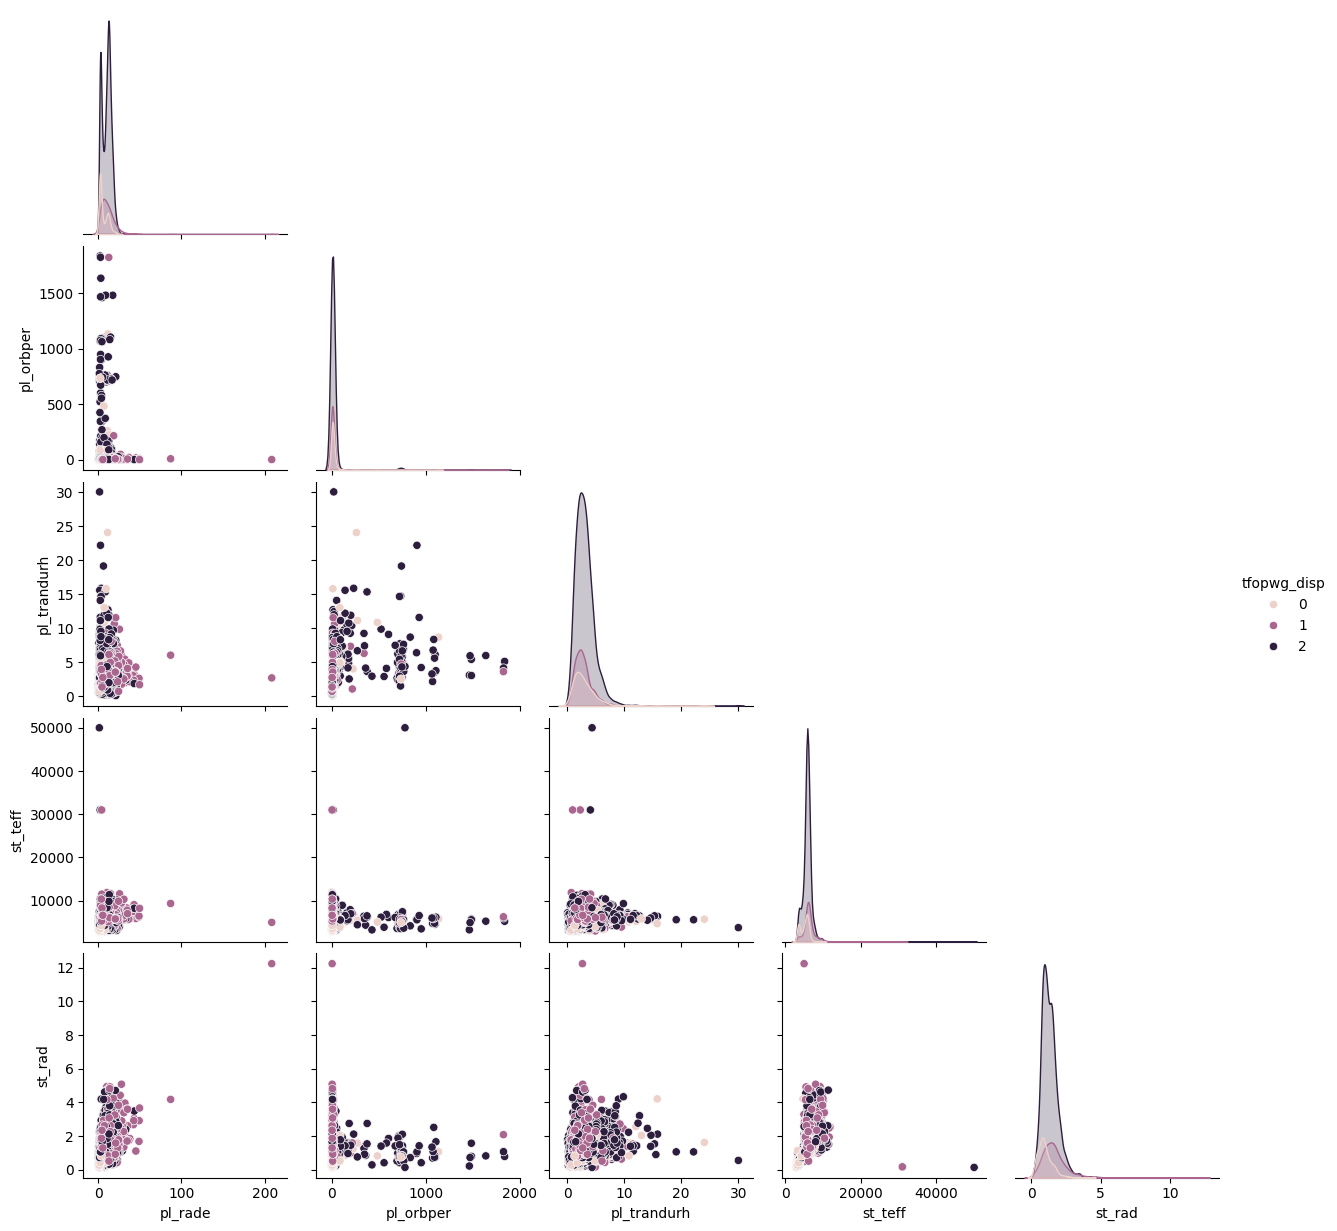

In [ ]:
# Pick a few features to avoid clutter
features_to_plot = ["pl_rade", "pl_orbper", "pl_trandurh", "st_teff", "st_rad"]
sns.pairplot(df[features_to_plot + ["tfopwg_disp"]], hue="tfopwg_disp", corner=True)
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Combine X_scaled and y into one array
data_scaled = np.hstack((X_scaled, y.values.reshape(-1, 1)))

# Create column names for the saved CSV
columns = list(X.columns) + [target_col]

# Convert to DataFrame and save
df_scaled = pd.DataFrame(data_scaled, columns=columns)
df_scaled.to_csv("tess_preprocessed_scaled.csv", index=False)

In [ ]:
import pickle
import json

print("Saving scaler...")
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved as 'scaler.pkl'")

print("\nSaving feature names...")
feature_names = list(X.columns)  # X is features DataFrame before scaling
with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f, indent=2)
print(f"✓ Feature names saved as 'feature_names.json'")
print(f"  Total features: {len(feature_names)}")

print("\n" + "="*50)
print("VERIFICATION")
print("="*50)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
print(f"\n✓ Scaler loaded successfully")
print(f"  Scaler type: {type(loaded_scaler)}")
print(f"  Number of features: {len(loaded_scaler.mean_)}")

with open('feature_names.json', 'r') as f:
    loaded_features = json.load(f)
print(f"\n✓ Feature names loaded successfully")
print(f"  Number of features: {len(loaded_features)}")
print(f"\n  First 5 features:")
for i, feat in enumerate(loaded_features[:5], 1):
    print(f"    {i}. {feat}")

print("\n" + "="*50)
print("EXAMPLE: How the web app will use these files")
print("="*50)

user_input = {
    "pl_orbper": 3.5,
    "pl_trandurh": 2.1,
    "pl_rade": 1.8
}

print("\n1. User sends data:")
print(f"   {user_input}")

user_df = pd.DataFrame([user_input])[loaded_features]
print("\n2. Reorder to match training data:")
print(f"   Columns: {list(user_df.columns[:5])}...")

user_scaled = loaded_scaler.transform(user_df)
print("\n3. Scale using saved scaler:")
print(f"   Scaled values (first 5): {user_scaled[0][:5]}")

print("\n✓ Ready for prediction!")

Saving scaler...
✓ Scaler saved as 'scaler.pkl'

Saving feature names...
✓ Feature names saved as 'feature_names.json'
  Total features: 13

VERIFICATION

✓ Scaler loaded successfully
  Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
  Number of features: 13

✓ Feature names loaded successfully
  Number of features: 13

  First 5 features:
    1. st_pmra
    2. st_pmdec
    3. pl_orbper
    4. pl_trandurh
    5. pl_trandep

EXAMPLE: How the web app will use these files

1. User sends data:
   {'pl_orbper': 3.5, 'pl_trandurh': 2.1, 'pl_rade': 1.8}


KeyError: "['st_pmra', 'st_pmdec', 'pl_trandep', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad'] not in index"